# Python imports

In [1]:
import os
import textwrap
from pprint import pprint
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
from dotenv import load_dotenv

# Loading Credentials from `.env`

In [2]:
load_dotenv(dotenv_path=".env", override=True)

API_KEY = os.environ.get("GEMINI_API_KEY", "")

client = genai.Client(api_key=API_KEY)

# Image Path Imports & Prompt Setup

In [7]:
# Base image prompts:
# 1. Dress: "A professionally shot photo of a blue floral summer dress on a plain white background, ghost mannequin style."
blue_dress_image = Image.open("./virtual-try-on/blue-dress.jpg")
model_image = Image.open("./virtual-try-on/female-model.png")

text_input = """Create a professional e-commerce fashion photo. Take the blue dress from the first image and let the woman from the second image wear it. 
Generate a realistic, full-body shot of the woman wearing the dress. Ensure the woman's face, her pose, and dress design and features remain completely unchanged.
ABSOLUTELY CRITICAL - FACIAL FIDELITY: Preserve the EXACT facial features, bone structure, eye shape, nose shape, lip shape, eyebrow shape, and facial proportions from the uploaded person's photo. DO NOT add, remove, or modify any facial features. DO NOT change or add hairstyles, haircuts, or hair textures - keep the exact same hair as in the original photo. DO NOT alter facial hair, makeup, or any other facial characteristics. The face should be an EXACT replica of the uploaded photo with zero modifications or "improvements."
ABSOLUTELY CRITICAL - SKIN TONE CONSISTENCY: The person's face, neck, hands, arms, and ALL visible skin areas must have the EXACT SAME skin tone, ethnicity, and complexion as shown in the uploaded person's photo. Do NOT mix different skin tones - if the person has light skin, ALL visible skin must be light; if they have dark skin, ALL visible skin must be dark. Ensure perfect skin tone uniformity across all visible body parts - the hands must match the face exactly. The background should be a smooth dark gray gradient transitioning from darker gray at the top to lighter gray at the bottom, exactly like professional Nike product photography studio backgrounds. The dress should fit naturally on the person and look realistic. Make it look like a high-quality Nike advertisement photo with a cropped, portrait-style framing. IMPORTANT: Do not include any watermarks, logos, text overlays, or branding marks from stock photo sites like Freepik, Shutterstock, or Getty Images. Generate a clean, professional image without any watermarks or text overlays.
Use the highest resolution and quality settings available to create a sharp, detailed image suitable for e-commerce fashion photography. The final image should look like it was taken by a professional photographer in a studio setting with perfect lighting and clarity.
"""

# Prompt warping for better redability

In [8]:
# Wrap the text to a specified width (e.g., 80 characters)
wrapped_text = textwrap.fill(text_input, width=80)

# Output as a string literal for a code cell
print(wrapped_text)

Create a professional e-commerce fashion photo. Take the blue dress from the
first image and let the woman from the second image wear it.  Generate a
realistic, full-body shot of the woman wearing the dress. Ensure the woman's
face, her pose, and dress design and features remain completely unchanged.
ABSOLUTELY CRITICAL - FACIAL FIDELITY: Preserve the EXACT facial features, bone
structure, eye shape, nose shape, lip shape, eyebrow shape, and facial
proportions from the uploaded person's photo. DO NOT add, remove, or modify any
facial features. DO NOT change or add hairstyles, haircuts, or hair textures -
keep the exact same hair as in the original photo. DO NOT alter facial hair,
makeup, or any other facial characteristics. The face should be an EXACT replica
of the uploaded photo with zero modifications or "improvements." ABSOLUTELY
CRITICAL - SKIN TONE CONSISTENCY: The person's face, neck, hands, arms, and ALL
visible skin areas must have the EXACT SAME skin tone, ethnicity, and comp

# Generate Image From Txext And Reference Image

In [9]:
response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",
    contents=[blue_dress_image, model_image, text_input],
)

image_parts = [
    part.inline_data.data
    for part in response.candidates[0].content.parts
    if part.inline_data
]

# Printing Image generation part

In [10]:
# print("Resonse:", response)

# [For Debug] Printing `image_parts` type

In [11]:
type(image_parts)

list

# Storing Image Locally

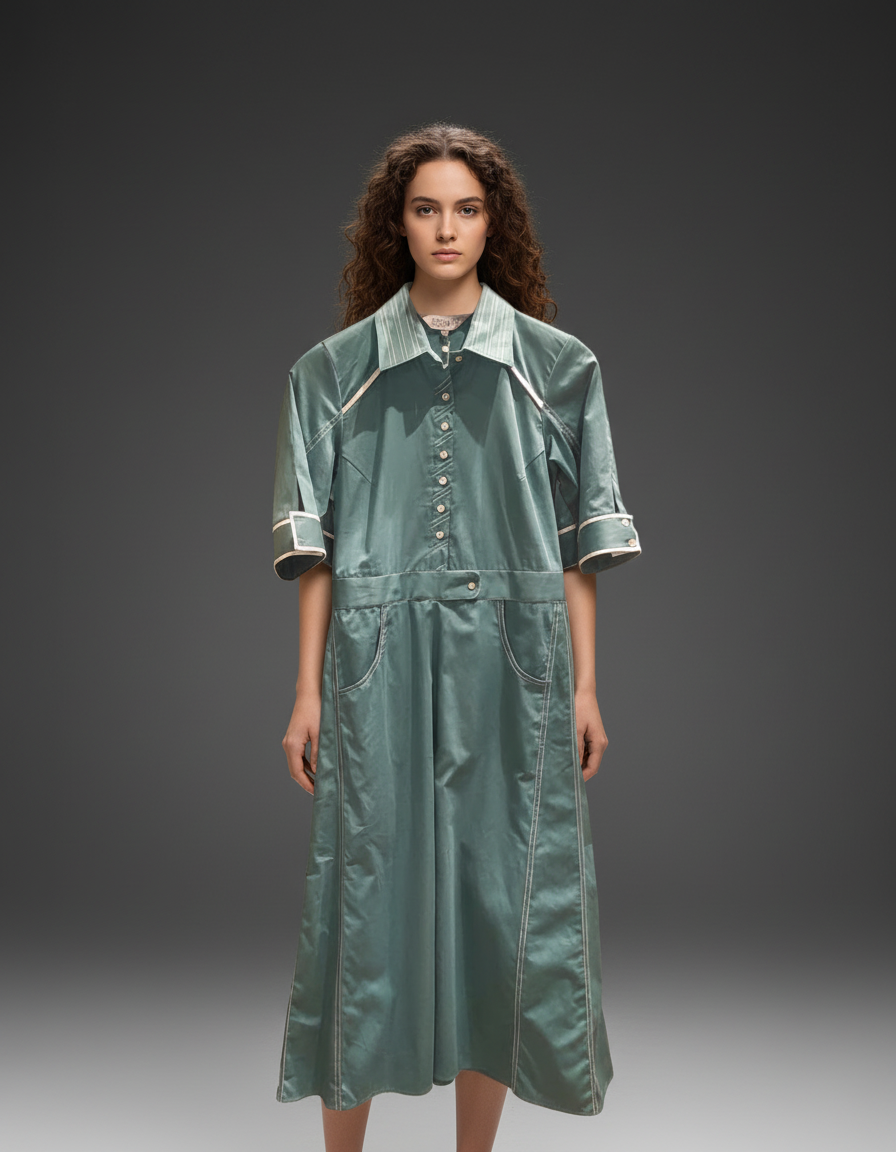

In [13]:
from uuid import uuid4
if image_parts:
    image = Image.open(BytesIO(image_parts[0]))
    image.save(f"./generated-images/fashion_ecommerce_shot_{uuid4()}.png")
    image.show()